### Steps:

1. Importing the libraries
2. Importing the datasets
3. EDA -> Exploratory Data Analysis
4. Feature Scaling
5. Encoding
6. Feature Selection
7. Model Selection -> Logistic Regression()
8. Split the data -> CV
9. Training the model
10. Testing the model
11. Performance Metrics -> Confusion Matrix

------------

1. Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

2. Importing the dataset : https://www.kaggle.com/datasets/yasserh/titanic-dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.shape

(891, 12)

<Axes: >

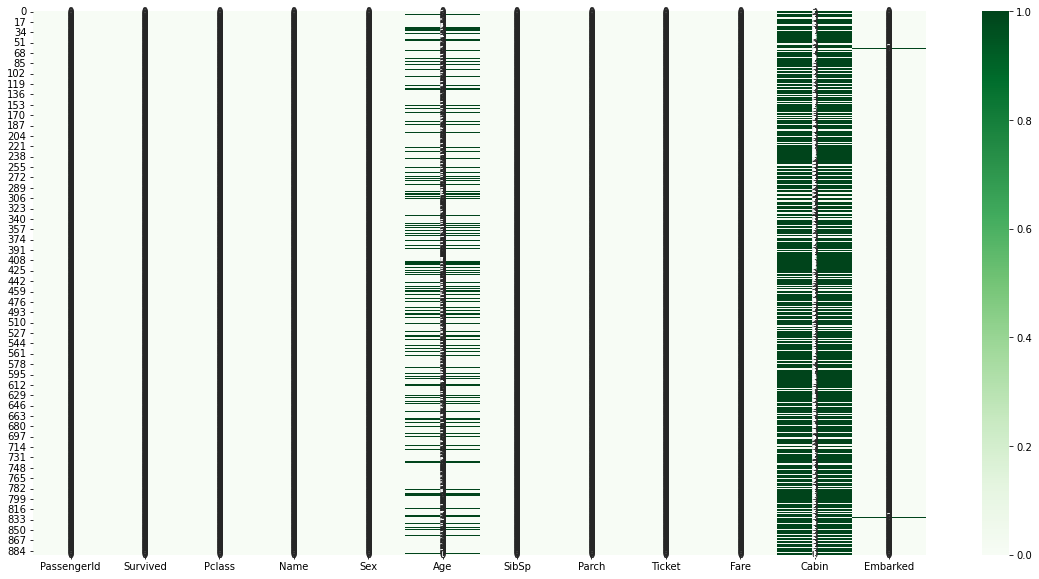

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),annot=True,cmap='Greens')

In [8]:
# % of null values in Age 
np.round(df.Age.isnull().sum()/len(df.Age)*100)

20.0

In [9]:
# % of null values in Cabin
np.round(df.Cabin.isnull().sum()/len(df.Cabin)*100)

77.0

In [10]:
df.Cabin.unique()


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [11]:
# Can delete the Cabin column
df.drop(columns=['Cabin'],inplace=True)

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [13]:
df.Embarked.unique()
# S -> Southampton
# Q -> Queenstown
# C -> Cherbourg

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
#Checking null values in Embarked
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [15]:
#All values of embarked with different PClass values
for i in df.Pclass.unique():
    print('When PClass=',i,'\n',df.loc[df.Pclass==i,'Embarked'].value_counts())
#No relation

When PClass= 3 
 Embarked
S    353
Q     72
C     66
Name: count, dtype: int64
When PClass= 1 
 Embarked
S    127
C     85
Q      2
Name: count, dtype: int64
When PClass= 2 
 Embarked
S    164
C     17
Q      3
Name: count, dtype: int64


In [16]:
#Need to drop the rows
df.Embarked.dropna(inplace=True)

In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [18]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [19]:
print('Mean=',df.Age.mean())
print('Median=',df.Age.median())
print("Mode=",df.Age.mode())

Mean= 29.69911764705882
Median= 28.0
Mode= 0    24.0
Name: Age, dtype: float64


In [20]:
df.loc[df.Age==24,'Age'].count()

30

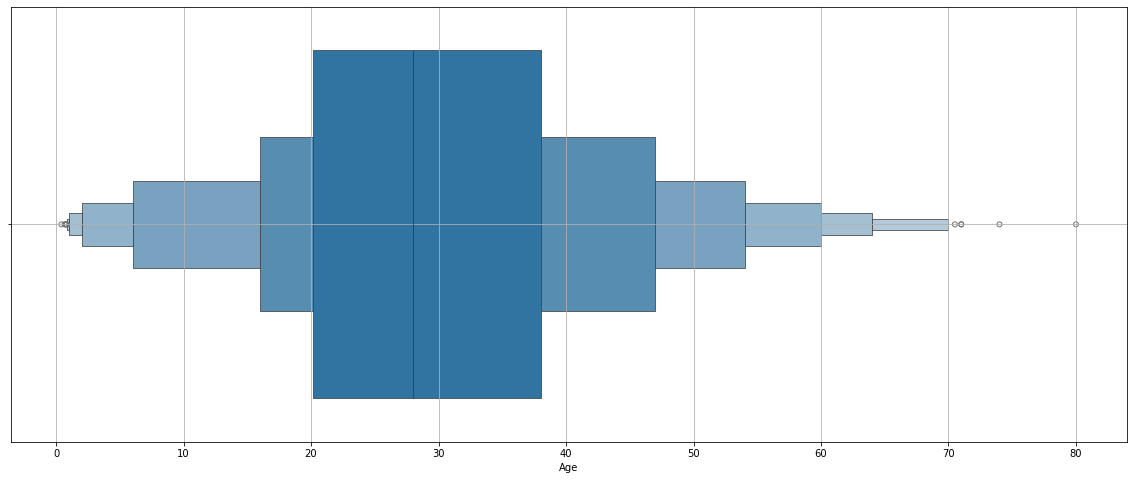

In [21]:
plt.figure(figsize=(20,8))
sns.boxenplot(df.Age,orient='h')
plt.grid()

In [22]:
#filling null values
df.Age.fillna(df.Age.median(),inplace=True)

In [23]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [24]:
df.shape

(891, 11)

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [26]:
df.Age=df.Age.astype(int)

In [27]:
df.Fare=df.Fare.round(2)

Deleting irrelevant data

In [28]:
df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)

In [29]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.25,S
1,1,1,female,38,1,0,71.28,C
2,1,3,female,26,0,0,7.92,S
3,1,1,female,35,1,0,53.10,S
4,0,3,male,35,0,0,8.05,S


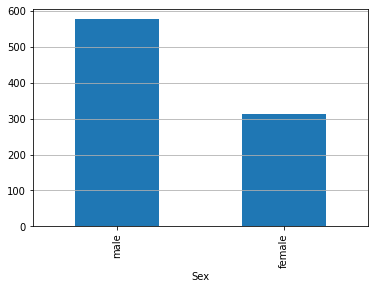

In [30]:
df.Sex.value_counts().plot.bar()
plt.grid(axis='y')

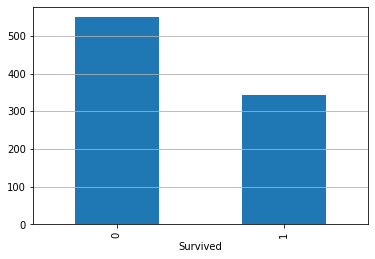

In [31]:
df.Survived.value_counts().plot.bar()
plt.grid(axis='y')

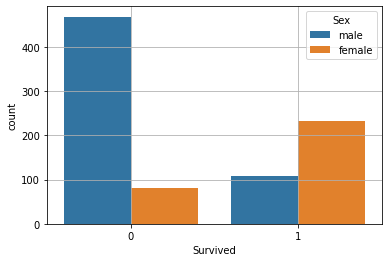

In [32]:
sns.countplot(df,x='Survived',hue='Sex')
plt.grid()

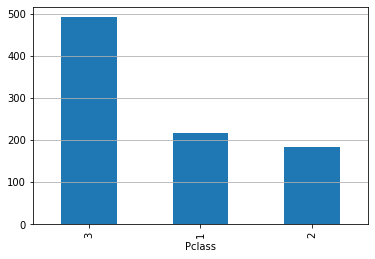

In [33]:
df.Pclass.value_counts().plot.bar()
plt.grid(axis='y')

C:\Users\arunk\AppData\Local\Temp\ipykernel_17036\1318142959.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:Green'` for the same effect.

  sns.countplot(df,x='Survived',hue='Pclass',color='Green')


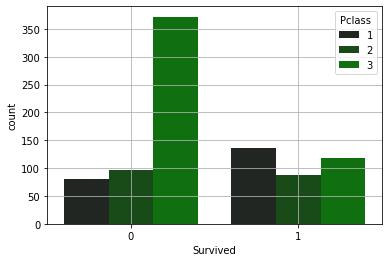

In [34]:
sns.countplot(df,x='Survived',hue='Pclass',color='Green')
plt.grid()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 52.3+ KB


Encoding

In [36]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.25,S
1,1,1,female,38,1,0,71.28,C
2,1,3,female,26,0,0,7.92,S
3,1,1,female,35,1,0,53.10,S
4,0,3,male,35,0,0,8.05,S


In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
enc=LabelEncoder()

In [39]:
df.Sex=enc.fit_transform(df.Sex)

In [40]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.25,S
1,1,1,0,38,1,0,71.28,C
2,1,3,0,26,0,0,7.92,S
3,1,1,0,35,1,0,53.10,S
4,0,3,1,35,0,0,8.05,S


In [41]:
df=pd.get_dummies(df,dtype=int,drop_first=True)

In [42]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22,1,0,7.25,0,1
1,1,1,0,38,1,0,71.28,0,0
2,1,3,0,26,0,0,7.92,0,1
3,1,1,0,35,1,0,53.10,0,1
4,0,3,1,35,0,0,8.05,0,1


Correlation

<Axes: >

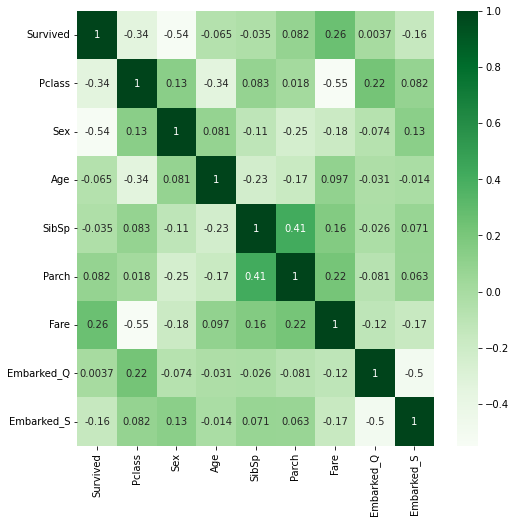

In [43]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

## Machine Learning

Feature Importance/Feature Selection

In [44]:
X =df.iloc[:,1:]
Y=df.iloc[:,0]

In [46]:
from sklearn.ensemble import ExtraTreesClassifier

In [47]:
feat=ExtraTreesClassifier()

In [48]:
feat.fit(X,Y)

ExtraTreesClassifier()

In [49]:
feat_imp=pd.Series(feat.feature_importances_,index=X.columns)

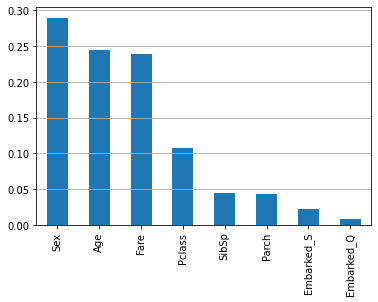

In [50]:
feat_imp.sort_values(ascending=False).plot.bar()
plt.grid(axis='y')

Splitting the data

In [51]:
skf=StratifiedKFold(n_splits=5)

In [70]:
for train_index,test_index in skf.split(X,Y):
    X_train,X_test=X.iloc[train_index],X.iloc[test_index]
    Y_train,Y_test=Y.iloc[train_index],Y.iloc[test_index]


Fitting the model

In [53]:
classifier=LogisticRegression()

Training the model

In [54]:
classifier.fit(X_train,Y_train)

c:\Users\arunk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Testing the model

In [55]:
Y_pred=classifier.predict(X_test)

In [56]:
final_df=pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred})

In [57]:
final_df.head()

,Actual,Predicted
706,1,1
707,1,0
708,1,1
709,1,0
710,1,1


<Axes: >

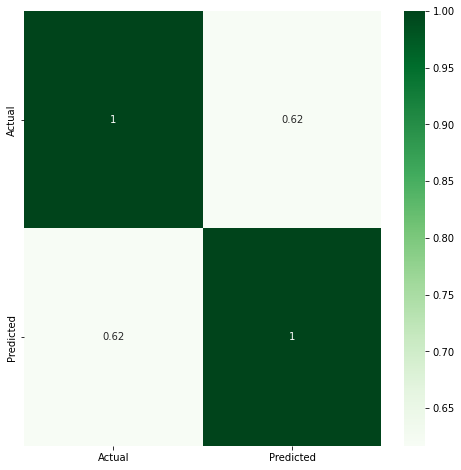

In [58]:
plt.figure(figsize=(8,8))
sns.heatmap(final_df.corr(),annot=True,cmap='Greens')

In [59]:
final_df.sum()

Actual       69
Predicted    63
dtype: int64

Performance Metrics -> Confusion Matrix

In [60]:
con=confusion_matrix(Y_test,Y_pred)

In [61]:
from sklearn.metrics import classification_report

In [62]:
classification_report(Y_test,Y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.88      0.86       109\n           1       0.79      0.72      0.76        69\n\n    accuracy                           0.82       178\n   macro avg       0.81      0.80      0.81       178\nweighted avg       0.82      0.82      0.82       178\n'

In [63]:
print(f'Accuracy={np.ceil((con[0][0]+con[1][1])/con.sum()*100)} %\n')
print(f'Error Rate={np.ceil(((con[0][1]+con[1][0])/con.sum())*100)} %\n')
print(f'Precision={np.ceil((con[0][0])/(con[0][0]+con[1][0])*100)} %\n')
print(f'Recall={np.ceil((con[0][0])/(con[0][0]+con[0][1])*100)} %\n')

Accuracy=83.0 %

Error Rate=18.0 %

Precision=84.0 %

Recall=89.0 %

